<a href="https://colab.research.google.com/github/gong-aipel/AIFFEL_quest-cr/blob/main/MainQuest/Quest02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/Pokemon.csv"  # 파일 경로 지정
df = pd.read_csv(file_path)  # CSV 파일 불러오기
print(df.head())  # 데이터 앞부분 출력

df.info()  # 데이터 타입, 결측치 확인
df.describe()  # 기초 통계 정보 확인
df.isnull().sum()  # 결측치 개수 확인

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Colu

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
file_path = "/content/drive/MyDrive/Pokemon.csv"
df = pd.read_csv(file_path)

# 불필요한 열 제거
df = df.drop(columns=["#", "Name"])

# 결측치 처리 (Type 2의 NaN을 "None"으로 대체)
df["Type 2"].fillna("None", inplace=True)

# 범주형 데이터(Label Encoding)
label_encoders = {}
for col in ["Type 1", "Type 2", "Legendary"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 범주형 데이터 → 숫자로 변환
    label_encoders[col] = le  # 인코더 저장 (나중에 역변환 가능)

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=["Legendary"])  # `Legendary`를 예측 목표로 설정
y = df["Legendary"]

# 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree 모델 정확도: {accuracy:.4f}") # 결과 값 확인 : 모델 정확도가 높음

Decision Tree 모델 정확도: 0.9688


<ipython-input-3-a625d864b0e6>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type 2"].fillna("None", inplace=True)


In [ ]:
# Type 1 고유값 개수 확인
type1_unique = df['Type 1'].nunique()
print("Type 1의 고유한 포켓몬 타입 개수:", type1_unique)

# Type 2 고유값 개수 확인
type2_unique = df['Type 2'].nunique()
print("Type 2의 고유한 포켓몬 타입 개수 (NaN 제외):", type2_unique)

# Type 1과 Type 2를 합친 전체 고유 타입 개수 확인
all_types = pd.concat([df['Type 1'], df['Type 2']]).dropna().unique()
print("모든 고유한 포켓몬 타입 개수:", len(all_types))

Type 1의 고유한 포켓몬 타입 개수: 18
Type 2의 고유한 포켓몬 타입 개수 (NaN 제외): 19
모든 고유한 포켓몬 타입 개수: 19


<ipython-input-5-0e04f9ef29db>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X.columns, palette="viridis")


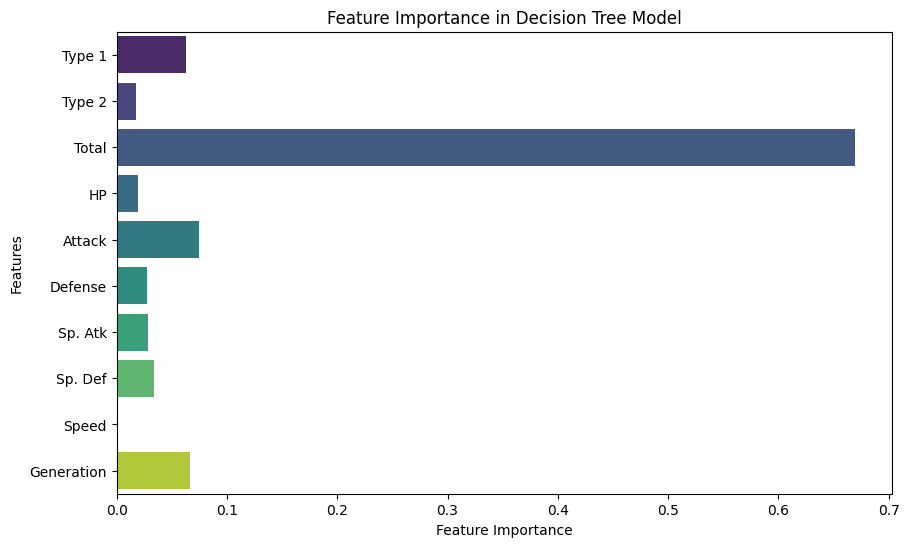

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.95625


<ipython-input-5-0e04f9ef29db>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="coolwarm")


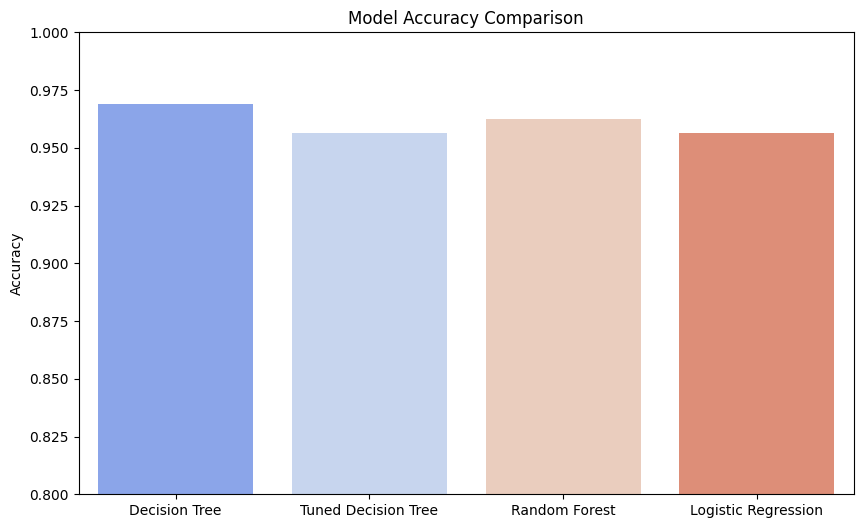

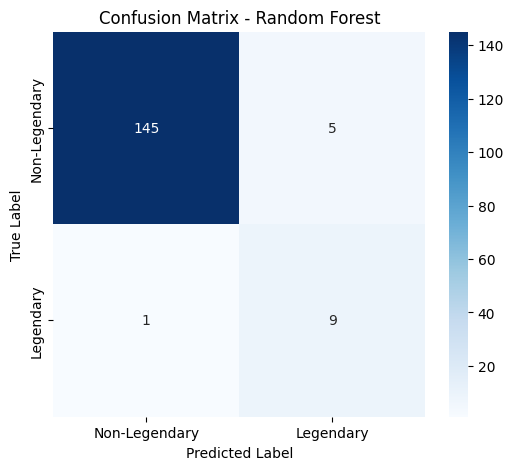

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 기본 Decision Tree 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Feature 중요도 확인
feature_importances = dt_model.feature_importances_

# 중요도 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.show()
# Hyperparameter Tuning (최적의 max_depth, min_samples_split 찾기)

from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 탐색 공간 정의
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 실행
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델 및 하이퍼파라미터 확인
best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_dt_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))

print("Best Parameters:", best_params)
print("Best Decision Tree Accuracy:", best_dt_accuracy)

# 랜덤 포레스트, 로지스틱 회귀 모델과 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 학습 및 평가
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# 로지스틱 회귀 모델 학습 및 평가
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# 결과 비교
model_names = ["Decision Tree", "Tuned Decision Tree", "Random Forest", "Logistic Regression"]
accuracies = [accuracy_score(y_test, dt_model.predict(X_test)), best_dt_accuracy, rf_accuracy, lr_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="coolwarm")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison")
plt.show()

# Confusion Matrix 시각화 (랜덤 포레스트 기준)

from sklearn.metrics import confusion_matrix

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-Legendary", "Legendary"], yticklabels=["Non-Legendary", "Legendary"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:41:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-6-65ff57470365>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Set2")


Random Forest Accuracy: 0.9625
Logistic Regression Accuracy: 0.95625
XGBoost Accuracy: 0.9625


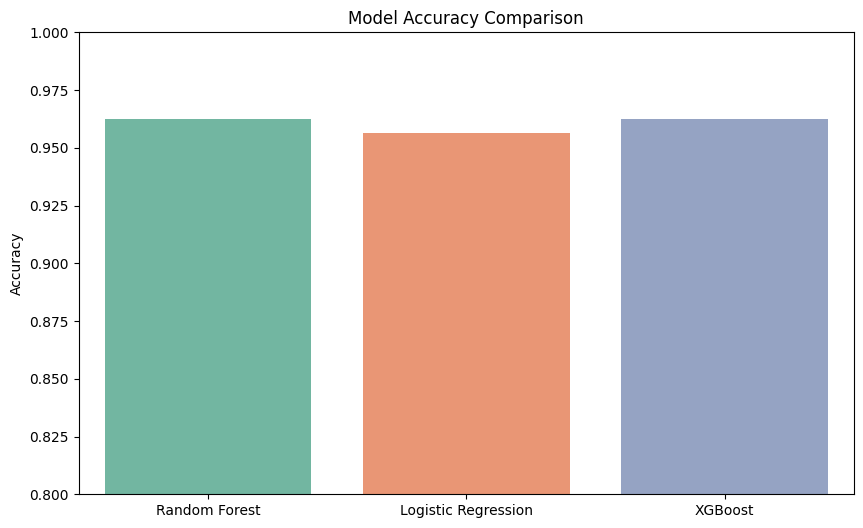

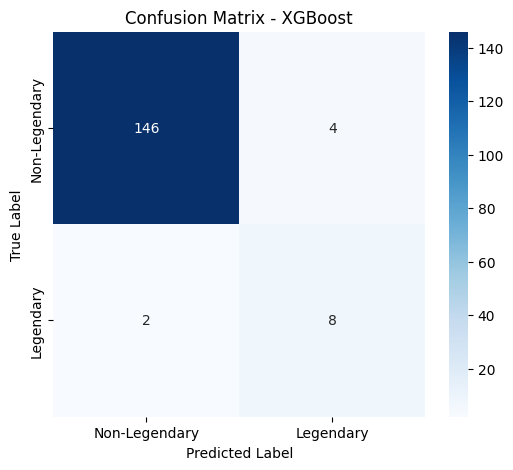

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# 결과 출력
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

# 성능 비교 시각화
model_names = ["Random Forest", "Logistic Regression", "XGBoost"]
accuracies = [rf_accuracy, lr_accuracy, xgb_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="Set2")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison")
plt.show()

# Confusion Matrix 예시 (XGBoost 기준)
conf_matrix = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-Legendary", "Legendary"], yticklabels=["Non-Legendary", "Legendary"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


보고서

1. 포켓몬 dataf를 다운로드하여 colab에 넣고 작업, LMS 노드와 함께 진행함

2. Dicision Tree 모델로 진행하면서 전처리 완료
3. 모델 학습 및 성공 여부 분석
   feature 엔지니어링, dicision Tree 모델
4. Dicision Tree모델과 다른 모델과 비교 분석
5. 로지스틱, 랜덤포레스트 XG boost 등으로 돌려 비교 분석

회고 : 간신히 쫒아가고 있기는 하지만 갈길이 너무 멀다는 느낌!!